## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].count()
mouse_count

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = combined_data[combined_data.duplicated(['Mouse ID',])]
all_duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_data.drop_duplicates("Mouse ID")
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_dataframe["Mouse ID"].count()
clean_mouse_count

249

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_of_the_tumor_volume = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_dataframe = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem_of_the_tumor_volume})
summary_dataframe


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  combined_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

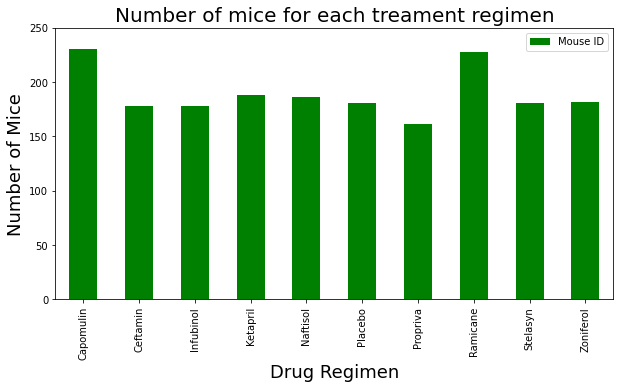

In [75]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()
drug_dataframe = drug_data[["Drug Regimen", "Mouse ID"]]
drug_dataframe = drug_dataframe.set_index("Drug Regimen")

#Creating a bar plot.
drug_dataframe.plot(kind="bar", alpha=1.0,figsize=(10,5),color='green',align='center')

#Set title, x-label and y-label:
#Set y-axis limits:
plt.title("Number of mice for each treament regimen",fontsize=20)
plt.xlabel("Drug Regimen",fontsize=18,color='black')
plt.ylabel("Number of Mice",fontsize=18,color='black')
plt.ylim(0, 250)
plt.show()


(0.0, 250.0)

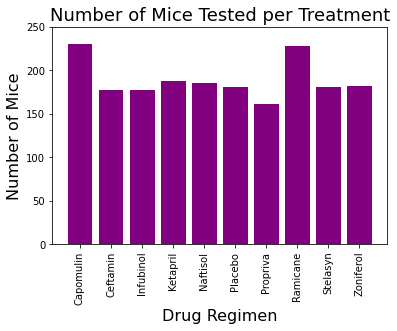

In [87]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot:
drug_category= summary_dataframe.index.tolist()
drug_category
drug_count=(combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

#Set the x-axis:
x_axis = np.arange(len(drug_count))
x_axis=drug_category

#Creating a bar chart and set the title, x-axis, y-axis:
plt.bar(x_axis, drug_count, color='purple', alpha=1.0, align="center")


plt.title("Number of Mice Tested per Treatment",fontsize=18,color='black')
plt.xlabel("Drug Regimen",fontsize=16)
plt.ylabel("Number of Mice",fontsize=16,color='black')
plt.xticks(rotation="vertical")
plt.ylim(0, 250)






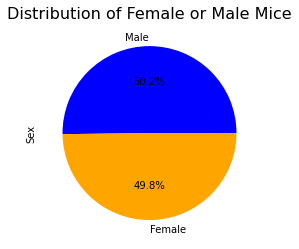

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors=['blue','orange']
gender_data = clean_dataframe["Sex"].value_counts()
plt.title("Distribution of Female or Male Mice",fontsize=16)
gender_data.plot.pie(colors=colors,autopct= "%1.1f%%")
plt.legend('',frameon=False)

plt.show()

Text(0, 0.5, 'Sex')

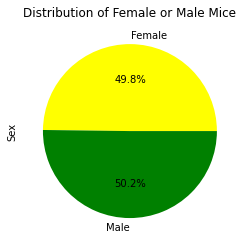

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_number= (clean_dataframe.groupby(["Sex"])["Age_months"].count()).tolist()

labels = ["Female", "Male"]
colors = ["yellow", "green"]


#creating the pie chart
plt.pie(gender_number, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Distribution of Female or Male Mice")
plt.ylabel('Sex')



## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

#Make "Tumor Volume (mm3)" a dataframe object
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Determine outliers using upper and lower bounds
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

# Capomulin
Capomulin_last_timepoint = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last_timepoint)
Capomulin_merge = pd.merge(Capomulin_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [140]:
#Ramicane
Ramicane_last_timepoint = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_last_timepoint)
Ramicane_merge = pd.merge(Ramicane_volume , combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print
print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [143]:
# Infubinol 
Infubinol_last_timepoint = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_last_timepoint)
Infubinol_merge = pd.merge(Infubinol_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print
print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")


The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [145]:
# Ceftamin
Ceftamin_last_timepoint = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_last_timepoint)
Ceftamin_merge = pd.merge(Ceftamin_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x121e45400>,
 'caps': [<matplotlib.lines.Line2D at 0x12172dd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x121e45700>,
 'medians': [<matplotlib.lines.Line2D at 0x12172d0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x120a4c550>,
 'means': []}

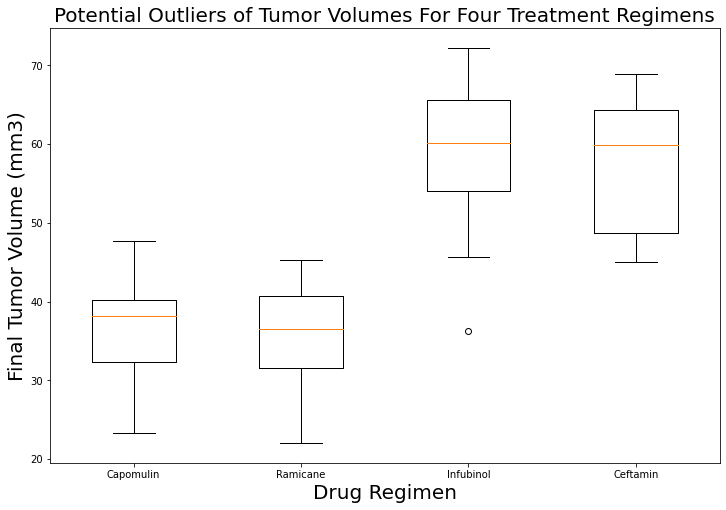

In [160]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_of_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
DrugRegimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(1, figsize=(12, 8))
ax1.set_title('Potential Outliers of Tumor Volumes For Four Treatment Regimens',fontsize=20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize=20, color='black')
ax1.set_xlabel('Drug Regimen',fontsize=20)
ax1.boxplot(boxplot_of_data, labels=DrugRegimen, widths = 0.5, vert=True)


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

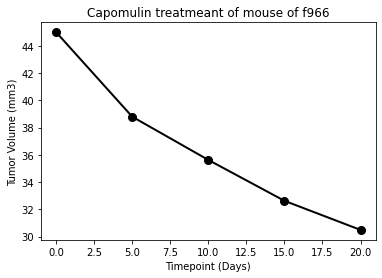

In [169]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "f966",:]
line_plot.head()
x_axis = line_plot["Timepoint"]
tumvol = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse of f966')
plt.plot(x_axis, tumvol,linewidth=2, markersize=8,marker="o",color="black")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

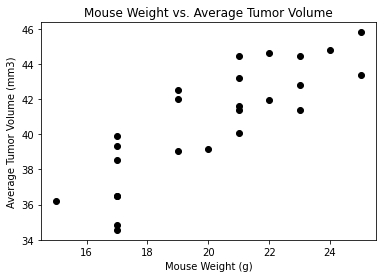

In [170]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="black")
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [175]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)

#Print
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

The correlation between mouse weight and the average tumor volume is 0.84


In [180]:
# Add the linear regression equation and line to plot
model=st.linregress(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
model


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

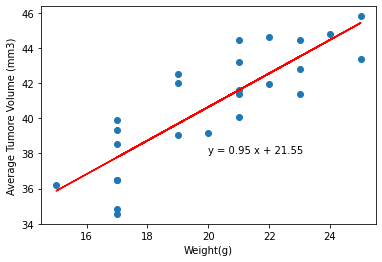

In [187]:
# According to the slope and intercept calculated above to add the linear regression equation and line to plot

slope = 0.9544396890241045
intercept = 21.552160532685015
line_equation= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

y_values = avg_capm_vol['Weight (g)']* slope + intercept
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.plot(avg_capm_vol['Weight (g)'],y_values,color="red")
plt.annotate(line_equation,(20,38))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()